In [2]:
import preliz as pz
from matplotlib import pyplot as plt

In [3]:
%matplotlib widget

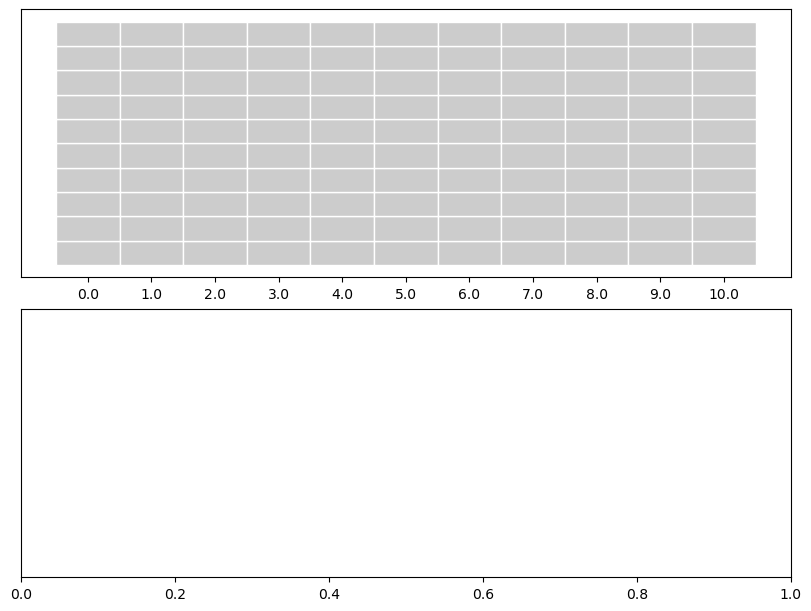

In [4]:
pz.roulette()

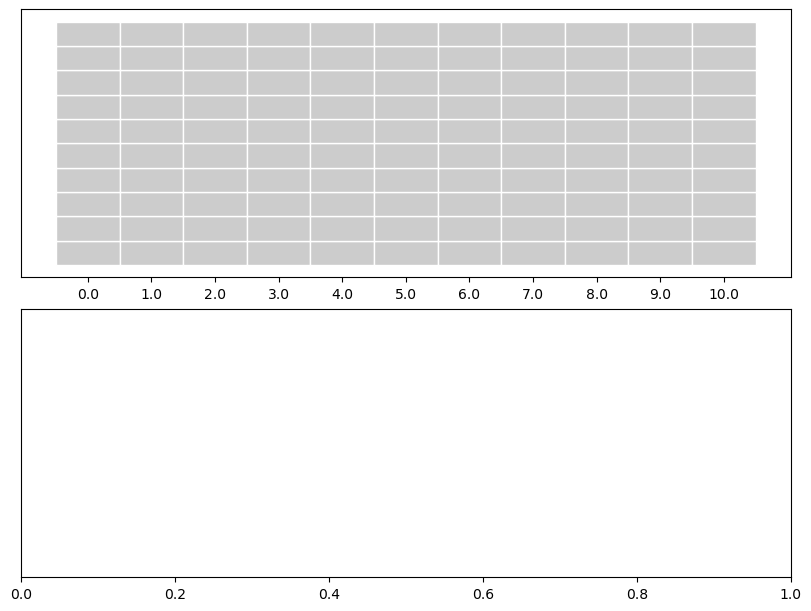

Beta(mean=0.6, median=0.6, std=0.08, lower=0.45, upper=0.74)

In [5]:
prob_frown=pz.Beta(alpha=24, beta=16)
plt.show()
prob_frown.summary()

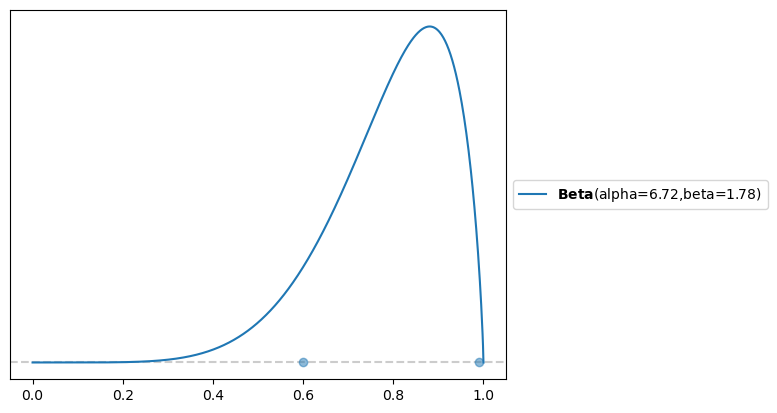

Beta(alpha=6.72,beta=1.78)

In [6]:
import numpy as np
#
plt.close()
prob_smile= pz.Beta()
pz.maxent(prob_smile, lower=.60, upper=.99, mass=.90,);
plt.show()
prob_smile



In [7]:
import numpy as np
import pymc as pm
import xarray as xr


No such comm: 67517626722f43f5bfe84610e1de1ec0


In [8]:

smiles = pm.BetaBinomial.dist(alpha=prob_smile.alpha,beta=prob_smile.beta, n=10, shape=100)
print(smiles.eval())
frowns = pm.BetaBinomial.dist(alpha=prob_frown.alpha, beta=prob_frown.beta, n=10-smiles, shape=100)
print(frowns.eval())

print((smiles+frowns).eval())

[ 7  8  7 10  8  8 10  7  7 10  7  8 10 10  8  5  8  7  7  9  7 10  6  9
 10  9  5  9 10 10  7  9 10  6  8  9  6  5 10  6  8  5  7  7 10  9 10  8
  5  4  7  8  8  7  9 10  8  9  9  8 10  6  9  9  7 10  9  5  8  8  8  5
 10  6  6  7 10 10  6  9  8  9  8  6  8 10  8  5  7  7  9  7 10  7  6  8
  9  5  9  9]
[2 2 1 0 1 0 0 3 2 0 3 2 0 0 2 4 2 1 1 1 2 0 2 1 0 0 2 1 0 0 2 0 0 1 1 1 2
 1 0 2 1 3 2 1 0 1 0 1 4 3 2 1 0 3 0 0 1 0 1 2 0 2 1 1 1 0 1 4 0 1 0 2 0 1
 3 2 0 0 3 1 2 1 2 1 1 0 0 4 2 0 0 2 0 1 2 0 1 4 1 1]
[ 9 10  8 10  9  8 10 10  9 10 10 10 10 10 10  9 10  8  8 10  9 10  8 10
 10  9  7 10 10 10  9  9 10  7  9 10  8  6 10  8  9  8  9  8 10 10 10  9
  9  7  9  9  8 10  9 10  9  9 10 10 10  8 10 10  8 10 10  9  8  9  8  7
 10  7  9  9 10 10  9 10 10 10 10  7  9 10  8  9  9  7  9  9 10  8  8  8
 10  9 10 10]


In [12]:


time = (np.arange(0, 100) * 10) + 222  # 100 data points separated in time by 10 seconds
lat_seed = np.linspace(-90, 90, 1)  # example latitude values
lon_seed = np.linspace(-180, 180, 1)  # example longitude values
altitude_seed = np.linspace(0, 1000, 1)  # example altitude values
coord_stack=[lat_seed,lon_seed,altitude_seed]
# Generate random differences between each successive data point
differences = np.random.rand(100,3)

# Calculate the cumulative sum of the differences to get the final values
coord_add_values = np.cumsum(differences, axis=0)
coord_stack+=coord_add_values.T
(lat,lon,altitude)=coord_stack

butterfly_flight = xr.DataArray(
    np.array([smiles.eval(),frowns.eval()]),  # example random data with differences
    dims=['expression', "time", ],
    coords={'expression': ["smiles","frowns"],"time": time, "lat": ('time', lat), "lon": ('time',lon), "altitude": ('time',altitude)},
)
butterfly_flight

<xarray.DataArray (expression: 2, time: 100)>
array([[ 9,  8, 10,  9, 10, 10, 10, 10,  9, 10, 10,  9, 10,  8,  8, 10,
        10, 10,  9, 10,  9,  9, 10, 10,  9,  9, 10, 10, 10,  9, 10,  6,
        10,  8, 10, 10, 10, 10,  8, 10,  8, 10,  9,  9,  9,  9, 10, 10,
        10,  8,  9,  6,  9, 10, 10, 10, 10,  9, 10,  9, 10, 10, 10, 10,
         9, 10,  8,  8, 10,  7, 10, 10, 10,  9, 10, 10, 10,  8,  8,  9,
         9,  7,  8, 10,  9, 10,  8,  9,  8,  9, 10,  6, 10, 10,  7,  9,
         9,  8, 10,  7],
       [ 2,  3,  1,  1,  2,  2,  1,  1,  5,  0,  1,  1,  1,  4,  2,  3,
         2,  1,  1,  2,  0,  1,  0,  0,  1,  5,  1,  1,  1,  4,  0,  0,
         3,  2,  1,  2,  5,  1,  0,  3,  0,  0,  1,  3,  0,  4,  3,  5,
         2,  1,  2,  2,  2,  0,  2,  3,  1,  2,  1,  2,  2,  1,  2,  1,
         3,  2,  1,  1,  2,  2,  4,  1,  2,  2,  0,  1,  1,  3,  2,  2,
         2,  4,  0,  1,  4,  1,  0,  0,  2,  2,  0,  3,  1,  3,  3,  4,
         1,  1,  1,  3]])
Coordinates:
  * expression  (expression) <U6 'smiles' 'frowns'
  * time        (time) int64 222 232 242 252 262 ... 1172 1182 1192 1202 1212
    lat         (time) float64 -89.58 -88.63 -88.14 ... -42.46 -41.8 -41.41
    lon         (time) float64 -179.7 -178.9 -178.4 ... -134.8 -134.3 -133.5
    altitude    (time) float64 0.2761 0.2929 0.6828 0.8516 ... 41.93 42.32 42.41

In [34]:

def convert_coords_to_pymc(dataset):
    return {i:ii.values for (i,ii) in dataset.coords.items() if isinstance(ii, xr.DataArray)}

# Example usage:
pymc_coords = convert_coords_to_pymc(butterfly_flight)
display(pymc_coords)


{'expression': array(['smiles', 'frowns'], dtype='<U6'),
 'time': array([ 222,  232,  242,  252,  262,  272,  282,  292,  302,  312,  322,
         332,  342,  352,  362,  372,  382,  392,  402,  412,  422,  432,
         442,  452,  462,  472,  482,  492,  502,  512,  522,  532,  542,
         552,  562,  572,  582,  592,  602,  612,  622,  632,  642,  652,
         662,  672,  682,  692,  702,  712,  722,  732,  742,  752,  762,
         772,  782,  792,  802,  812,  822,  832,  842,  852,  862,  872,
         882,  892,  902,  912,  922,  932,  942,  952,  962,  972,  982,
         992, 1002, 1012, 1022, 1032, 1042, 1052, 1062, 1072, 1082, 1092,
        1102, 1112, 1122, 1132, 1142, 1152, 1162, 1172, 1182, 1192, 1202,
        1212]),
 'lat': array([-89.58482907, -88.62971527, -88.14423773, -87.82449712,
        -87.67088154, -86.97245411, -86.22950163, -85.90947999,
        -85.12904737, -84.65083772, -84.58379281, -83.83052315,
        -82.95550683, -82.49048565, -81.62110411, -80.

In [47]:
with pm.Model(coords=convert_coords_to_pymc(butterfly_flight)) as dim_import_test:
    data_smiles = pm.Data('smiles_obs',butterfly_flight['expression'=='smiles'],mutable=True,infer_dims_and_coords=True, dims='time')
    data_frowns = pm.Data('frowns_obs',butterfly_flight['expression'=='frowns'],mutable=True,infer_dims_and_coords=True, dims='time')
    smile_alpha = pm.HalfCauchy('smile_alpha', beta=prob_smile.alpha)
    smile_beta = pm.HalfCauchy('smile_beta', beta=prob_smile.beta)
    frown_alpha = pm.HalfCauchy('frown_alpha', beta=prob_frown.alpha)
    frown_beta = pm.HalfCauchy('frown_beta', beta=prob_frown.beta)


    smiles = pm.BetaBinomial('smiles', alpha=smile_alpha, beta=smile_beta, n=10, observed=data_smiles, dims='time')
    frowns = pm.BetaBinomial('frowns', alpha=frown_alpha, beta=frown_beta, n=10, observed=data_frowns, dims='time')

    trace = pm.sample(1000, tune=1000, cores=1, chains=1, return_inferencedata=True)

    


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [smile_alpha, smile_beta, frown_alpha, frown_beta]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 4 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


In [48]:
trace

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data
	> constant_data

In [41]:
butterfly_flight['expression'=='smiles']

<xarray.DataArray (time: 100)>
array([ 9,  8, 10,  9, 10, 10, 10, 10,  9, 10, 10,  9, 10,  8,  8, 10, 10,
       10,  9, 10,  9,  9, 10, 10,  9,  9, 10, 10, 10,  9, 10,  6, 10,  8,
       10, 10, 10, 10,  8, 10,  8, 10,  9,  9,  9,  9, 10, 10, 10,  8,  9,
        6,  9, 10, 10, 10, 10,  9, 10,  9, 10, 10, 10, 10,  9, 10,  8,  8,
       10,  7, 10, 10, 10,  9, 10, 10, 10,  8,  8,  9,  9,  7,  8, 10,  9,
       10,  8,  9,  8,  9, 10,  6, 10, 10,  7,  9,  9,  8, 10,  7])
Coordinates:
    expression  <U6 'smiles'
  * time        (time) int64 222 232 242 252 262 ... 1172 1182 1192 1202 1212
    lat         (time) float64 -89.58 -88.63 -88.14 ... -42.46 -41.8 -41.41
    lon         (time) float64 -179.7 -178.9 -178.4 ... -134.8 -134.3 -133.5
    altitude    (time) float64 0.2761 0.2929 0.6828 0.8516 ... 41.93 42.32 42.41